## Supervised Learning For Stock Prediction ## 

In [87]:
# Import all packages 
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import datetime 

# Downloaded data from yahoo finance as csv into excel, but yahoo finance api can work better
# Here we are also going to drop the Adj Close and Date column as these are not needed for our model to learn and predict
df_work = pd.read_csv("C:\\Users\\bavsr\\Downloads\\MGK.csv",sep=',')
df = df_work.copy()
df.set_index(pd.DatetimeIndex(df['Date'].values))
df.drop('Adj Close',axis=1,inplace = True) 
df.drop('Date',axis=1,inplace = True)
df

,Open,High,Low,Close,Volume
0,85.790001,85.849998,85.510002,85.540001,83500
1,85.639999,85.660004,84.339996,84.889999,154600
2,84.620003,84.930000,84.160004,84.269997,108500
3,84.300003,84.379997,83.690002,83.790001,81100
4,83.720001,84.250000,83.680000,83.720001,133800
...,...,...,...,...,...
1253,247.960007,248.619995,245.710007,246.979996,170200
1254,247.720001,249.649994,246.500000,249.160004,229400
1255,250.690002,252.139999,249.289993,249.889999,190400
1256,250.369995,252.750000,250.130005,250.630005,183400


Text(0, 0.5, 'Close Price')

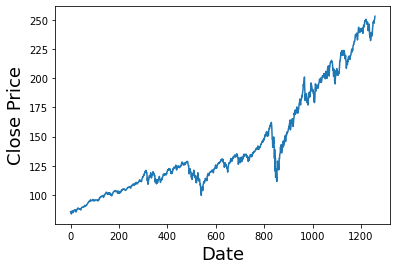

In [88]:
# Simple plot of the MGK ETF data for visualistation
plt.figure
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)

## Create Function For Technical Indicators ##


In [89]:
def SMA(
        data, 
        period=30,
        column = 'Close'
    ):
  
    return data[column].rolling(window = period).mean()



def EMA(
        data, 
        period = None,
        column = 'Close',
    ):


    return data[column].ewm(span=14).mean()

In [90]:
df['SMA20'] = SMA(df,20)
df['EMA'] = df['Close'].ewm(span=14).mean()
df.dropna(subset = ["SMA20"], inplace=True)
df.reset_index(drop=True)  
df

,Open,High,Low,Close,Volume,SMA20,EMA
19,87.050003,87.190002,86.760002,86.790001,64400,85.763000,86.351498
20,86.760002,87.290001,86.760002,87.059998,80100,85.839000,86.450888
21,87.239998,87.239998,86.370003,86.370003,118100,85.913000,86.439619
22,86.440002,86.440002,85.269997,85.449997,81300,85.972000,86.302571
23,85.339996,85.800003,85.320000,85.519997,136100,86.058500,86.194751
...,...,...,...,...,...,...,...
1253,247.960007,248.619995,245.710007,246.979996,170200,240.207498,243.537685
1254,247.720001,249.649994,246.500000,249.160004,229400,240.459998,244.287327
1255,250.690002,252.139999,249.289993,249.889999,190400,241.109499,245.034350
1256,250.369995,252.750000,250.130005,250.630005,183400,241.824499,245.780438


In [91]:
def momentum(df, n):
    M = pd.Series(df['Close'].diff(n), name='Momentum_' + str(n))
    df = df.join(M)
    return df

In [92]:
df=momentum(df,20)
df

,Open,High,Low,Close,Volume,SMA20,EMA,Momentum_20
19,87.050003,87.190002,86.760002,86.790001,64400,85.763000,86.351498,NaN
20,86.760002,87.290001,86.760002,87.059998,80100,85.839000,86.450888,NaN
21,87.239998,87.239998,86.370003,86.370003,118100,85.913000,86.439619,NaN
22,86.440002,86.440002,85.269997,85.449997,81300,85.972000,86.302571,NaN
23,85.339996,85.800003,85.320000,85.519997,136100,86.058500,86.194751,NaN
...,...,...,...,...,...,...,...,...
1253,247.960007,248.619995,245.710007,246.979996,170200,240.207498,243.537685,0.699997
1254,247.720001,249.649994,246.500000,249.160004,229400,240.459998,244.287327,5.050003
1255,250.690002,252.139999,249.289993,249.889999,190400,241.109499,245.034350,12.990005
1256,250.369995,252.750000,250.130005,250.630005,183400,241.824499,245.780438,14.300003


In [93]:
df.dropna(subset=['Momentum_20'],inplace=True)
final_df=df.reset_index(drop=True)
final_df

,Open,High,Low,Close,Volume,SMA20,EMA,Momentum_20
0,88.099998,88.559998,88.070000,88.290001,79200,87.513001,87.881816,1.500000
1,88.440002,88.440002,87.599998,87.629997,74900,87.541501,87.848145,0.569999
2,87.610001,87.739998,87.459999,87.660004,60900,87.606001,87.822998,1.290001
3,87.730003,87.730003,86.830002,87.110001,60600,87.689001,87.727729,1.660004
4,87.559998,88.070000,87.330002,87.760002,112500,87.801001,87.732040,2.240005
...,...,...,...,...,...,...,...,...
1214,247.960007,248.619995,245.710007,246.979996,170200,240.207498,243.537685,0.699997
1215,247.720001,249.649994,246.500000,249.160004,229400,240.459998,244.287327,5.050003
1216,250.690002,252.139999,249.289993,249.889999,190400,241.109499,245.034350,12.990005
1217,250.369995,252.750000,250.130005,250.630005,183400,241.824499,245.780438,14.300003


In [94]:
# filter out the features df we use to train our logistic regression model
features=df.filter(['Open','High','Low','Close','SMA20','EMA','Momentum_20'])
features=features.reset_index(drop=True)
features

,Open,High,Low,Close,SMA20,EMA,Momentum_20
0,88.099998,88.559998,88.070000,88.290001,87.513001,87.881816,1.500000
1,88.440002,88.440002,87.599998,87.629997,87.541501,87.848145,0.569999
2,87.610001,87.739998,87.459999,87.660004,87.606001,87.822998,1.290001
3,87.730003,87.730003,86.830002,87.110001,87.689001,87.727729,1.660004
4,87.559998,88.070000,87.330002,87.760002,87.801001,87.732040,2.240005
...,...,...,...,...,...,...,...
1214,247.960007,248.619995,245.710007,246.979996,240.207498,243.537685,0.699997
1215,247.720001,249.649994,246.500000,249.160004,240.459998,244.287327,5.050003
1216,250.690002,252.139999,249.289993,249.889999,241.109499,245.034350,12.990005
1217,250.369995,252.750000,250.130005,250.630005,241.824499,245.780438,14.300003


In [95]:
# This code is assinging binary labels 1 and 0 depending if the stock previous close price is either above or below, 
# the nex days one respectively
is_first = True
target_vec = []
prev_close = 0
for i in final_df['Close']:
    if is_first:
        target_vec.append(0)
        is_first = False
    else:
        val = 1 if (i>prev_close) else 0
        target_vec.append(val)
    prev_close = i
final_df['target'] = target_vec

In [96]:
final_df.drop('Volume',axis=1,inplace=True)
final_df

,Open,High,Low,Close,SMA20,EMA,Momentum_20,target
0,88.099998,88.559998,88.070000,88.290001,87.513001,87.881816,1.500000,0
1,88.440002,88.440002,87.599998,87.629997,87.541501,87.848145,0.569999,0
2,87.610001,87.739998,87.459999,87.660004,87.606001,87.822998,1.290001,1
3,87.730003,87.730003,86.830002,87.110001,87.689001,87.727729,1.660004,0
4,87.559998,88.070000,87.330002,87.760002,87.801001,87.732040,2.240005,1
...,...,...,...,...,...,...,...,...
1214,247.960007,248.619995,245.710007,246.979996,240.207498,243.537685,0.699997,0
1215,247.720001,249.649994,246.500000,249.160004,240.459998,244.287327,5.050003,1
1216,250.690002,252.139999,249.289993,249.889999,241.109499,245.034350,12.990005,1
1217,250.369995,252.750000,250.130005,250.630005,241.824499,245.780438,14.300003,1


# Correlation Matrix 

<AxesSubplot:>

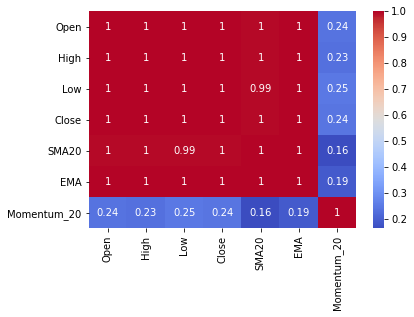

In [97]:
# Here we build a correlation matrix and visualse.
corr=features.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

# Features Scaling MinMax, Standard Scaling


# StandardScaling

In [13]:
from sklearn.preprocessing import StandardScaler
scaled_features =StandardScaler().fit_transform(features.values)

In [14]:
# This is our scaled features df
scaled_features_df=pd.DataFrame(scaled_features, index=features.index, columns=features.columns)
scaled_features_df

,Open,High,Low,Close,SMA20,EMA,Momentum_20
0,-1.281171,-1.281545,-1.270074,-1.276920,-1.288508,-1.283263,-0.134953
1,-1.273531,-1.284224,-1.280720,-1.291746,-1.287857,-1.284029,-0.254718
2,-1.292182,-1.299853,-1.283891,-1.291072,-1.286383,-1.284602,-0.161996
3,-1.289485,-1.300076,-1.298160,-1.303428,-1.284486,-1.286769,-0.114347
4,-1.293305,-1.292485,-1.286835,-1.288826,-1.281927,-1.286671,-0.039655
...,...,...,...,...,...,...,...
1214,2.311031,2.292086,2.300517,2.287965,2.200883,2.258199,-0.237977
1215,2.305638,2.315083,2.318411,2.336938,2.206653,2.275255,0.322216
1216,2.372377,2.370677,2.381605,2.353337,2.221495,2.292251,1.344729
1217,2.365186,2.384296,2.400631,2.369961,2.237834,2.309226,1.513430


MinMax Scaler

In [15]:
#from sklearn import preprocessing
#minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
#minmax_scaled_f=minmax_scale.fit_transform(features.values)
#minmax_scaled_df=pd.DataFrame(minmax_scaled_f,index=features.index,columns=features.columns)
#minmax_scaled_df

Define features and targets(labels)

In [16]:
X=scaled_features_df.values
y=final_df['target'].values

# Train test and split.

In [17]:
# Running imports from sklearn to split train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, Lasso, Ridge

# Metrics
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print(f"Train and Test Size {len(X_train)}, {len(X_test)}")


Train and Test Size 731, 488


# Logit Regression and Predicting 

In [18]:
#Method 1 logstic regression and predicitng
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_train, y_train)

0.6347469220246238

# Confusion Matrix and scores 

In [19]:
# Calculating the accuary of our model via confusion matrix
from sklearn.metrics import(confusion_matrix,accuracy_score) 
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
cm

array([[ 52, 151],
       [ 32, 253]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
#Calcuating Recall and Precision: (Summary)
from sklearn.metrics import f1_score,precision_score,recall_score
print(f'f1 score:{f1_score(y_test,y_pred)}')
print(f'precision:{precision_score(y_test,y_pred)}')
print(f'recall_score:{recall_score(y_test,y_pred)}')

              precision    recall  f1-score   support

           0       0.62      0.26      0.36       203
           1       0.63      0.89      0.73       285

    accuracy                           0.62       488
   macro avg       0.62      0.57      0.55       488
weighted avg       0.62      0.62      0.58       488

f1 score:0.7343976777939043
precision:0.6262376237623762
recall_score:0.887719298245614


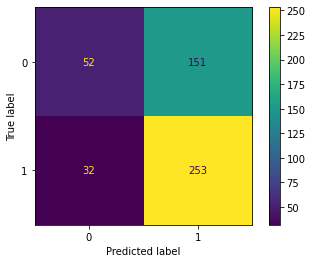

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.58196721 0.58196721 0.63934426 0.62295082 0.71311475 0.68032787
 0.64754098 0.62295082 0.67213115 0.69421488]
0.645650995800027


As you can see the CV mean score is very similar to the actual score, hence we know the model is working fine.

In [23]:
print(logreg.coef_)

[[-2.36428427 -0.12418921  0.60266798  3.22779982 -0.1729457  -1.20431848
   0.33840344]]


# LASSO Logsitic regression L1 Penatly 

Penalty Terms
L1 regularization adds an L1 penalty equal to the absolute value of the magnitude of coefficients

A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.
The key difference between these two is the penalty term.


Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.

In [61]:
from sklearn import linear_model
log_reg_L1=linear_model.LogisticRegression(C=1,penalty='l1', solver='liblinear')

In [62]:
log_reg_L1.fit(X_train,y_train)
log_reg_L1.score(X_test,y_test) #You can see L1 has penalised those features that do not contribute much. hence the score has 
#improved abit.

0.7745901639344263

In [63]:
print(log_reg_L1.coef_)

[[-28.53492397   0.           0.          34.43521307   0.
   -5.85621281   0.13307604]]


As you can see Lasso L1 penealises the features that do not contribute. And the most contribute features are; <br>
1)Open <br> 
2)Close <br>
3)EMA <br>
4)Momentum_20 <br>
 

In [64]:
#Hyperparamter Tuning and finding the optimal 'C' through grid search method 
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(log_reg_L1,{'C':[.001,.01,.1,10]})
grid.fit(X_train,y_train)

C:\Users\bavsr\OneDrive\Documents\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\bavsr\OneDrive\Documents\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\bavsr\OneDrive\Documents\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\bavsr\OneDrive\Documents\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\bavsr\OneDrive\Documents\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed t

GridSearchCV(estimator=LogisticRegression(C=1, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 10]})

In [65]:
print(f'Best value of C is:{grid.best_params_}')
print(f'Best Score value is{grid.best_score_}')


Best value of C is:{'C': 10}
Best Score value is0.8016401080980338


# Ridge Regression L2

In [66]:
#Method 2
rid = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=1))
])

In [67]:
rid.fit(X, y)
print(f'R^2 Train: {rid.score(X_train, y_train):0.4}')
print(f'R^2 Test: {rid.score(X_test, y_test):0.4}')

R^2 Train: 0.2276
R^2 Test: 0.2214


In [68]:
rid['regressor'].coef_ 

array([-2.82438954, -0.15626795,  0.41067267,  3.49676034,  0.21227235,
       -1.13881937,  0.02784599])

In [69]:
# alpha_range = np.arange(1,2000,100)
alpha_range = 10**np.linspace(6,-2,100)*0.5
rid_coef = []

for i in alpha_range:
    rid = Pipeline([('scaler', StandardScaler()), ('regressor', Ridge(alpha=i))])
    rid.fit(X, y)
    rid_coef.append(rid['regressor'].coef_)

In [70]:
def plot_coeff(alpha_range, coef, modelname):
    
    # Plot Coefficients
    fig = plt.figure(figsize=(20,8))
    ax = plt.axes()
    
    ax.plot(alpha_range, coef)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    ax.set_title(f'{modelname} coefficients as a function of the regularization')
    ax.set_xlabel('$\lambda$')
    ax.set_ylabel('$\mathbf{w}$')
    

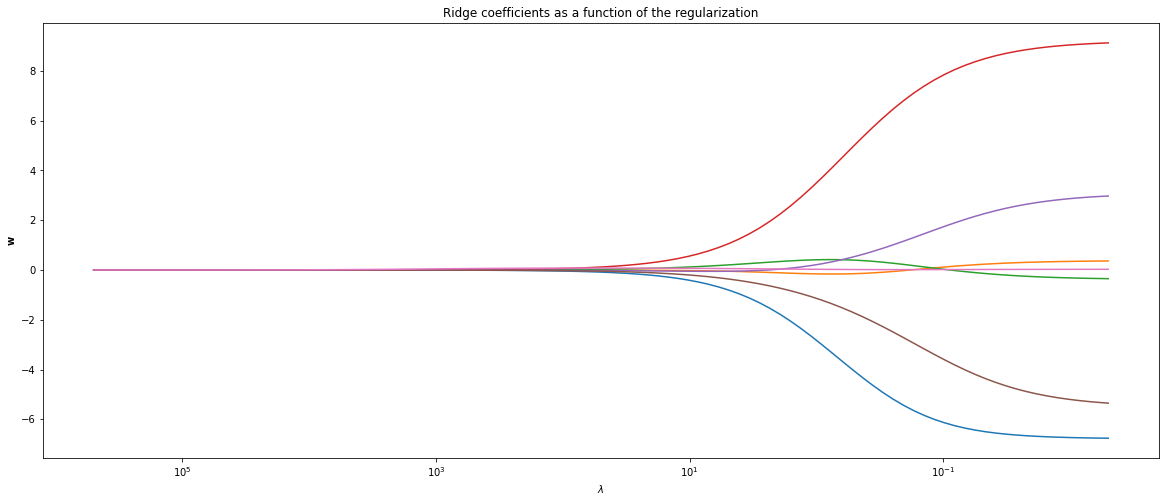

In [71]:
# Plot Coefficients
plot_coeff(alpha_range, rid_coef, 'Ridge')

As you can see, the 3 highest coffiecent(features) is Close, Low price and SMA20

PLotting and comparing the features that Lasso and Ridge gave us.

Lasso (L1) vs Ridge(L2)

In [72]:
lasso_df=pd.DataFrame(log_reg_L1.coef_,columns=['Open','High','Low','Close','SM20','EMA','Momentum_20'],index=['LASSO L1'])
lasso_df


,Open,High,Low,Close,SM20,EMA,Momentum_20
LASSO L1,-28.534924,0.0,0.0,34.435213,0.0,-5.856213,0.133076


In [73]:
dic={'RIDEG L2':['-2.82438954', '-0.15626795',  '0.41067267',  '3.49676034',  '0.21227235','-1.13881937',  '0.02784599']}
rid_df=pd.DataFrame(dic, index =['Open','High','Low','Close','SM20','EMA','Momentum_20'])  
rid_df

,RIDEG L2
Open,-2.82438954
High,-0.15626795
Low,0.41067267
Close,3.49676034
SM20,0.21227235
EMA,-1.13881937
Momentum_20,0.02784599


In [74]:
frames=[lasso_df,rid_df.T]
df_merge=pd.concat(frames)
df_merge

,Open,High,Low,Close,SM20,EMA,Momentum_20
LASSO L1,-28.5349,0,0,34.4352,0,-5.85621,0.133076
RIDEG L2,-2.82438954,-0.15626795,0.41067267,3.49676034,0.21227235,-1.13881937,0.02784599


## LASSO (L1) VS RIDGE (L2) ##
In supervised learning, ML models get trained on training data , there are the possibilities that the model performs accurately on training data but fails to perform well on test data. This is known as overfitting. It also produces high error due to several factors such as collinearity, bias-variance impact and over modeling on train data.

Overfitting simply states that there is low error with respect to training dataset, and high error with respect to test datasets. 

Firstly Let's take a look at what the Bias-Variance trade off states:<br>
In statistics and machine learning, the bias–variance tradeoff is the property of a model that the variance of the parameter estimated across samples can be reduced by increasing the bias in the estimated parameters. The bias–variance dilemma or bias–variance problem is the conflict in trying to simultaneously minimize these two sources of error that prevent supervised learning algorithms from generalizing beyond their training set

The bias error is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
The variance is an error from sensitivity to small fluctuations in the training set. High variance may result from an algorithm modeling the random noise in the training data (overfitting).

Therefore, for a generalized data model, we must keep bias possibly low while modelling that leads to high accuracy. And, one should not obtain greatly varied results from output, therefore, low variance is recommended for a model to perform good.

Comparision<br>

Both L1 and L2 can add a penalty to the cost depending upon the model complexity, so at the place of computing the cost by using a loss function, there will be an auxiliary component, known as regularization terms, added in order to panelizing complex models.

**L2 is likely to have low variance and high bias than L1**


# Plotting Logstic Sigmoid For The Three Best Features
1)Open <br>
2)Close <br>
3)Momentum_20

In [75]:
Mo_20=scaled_features_df['Momentum_20']
Close_v=scaled_features_df['Close']
Open_v=scaled_features_df['Open']

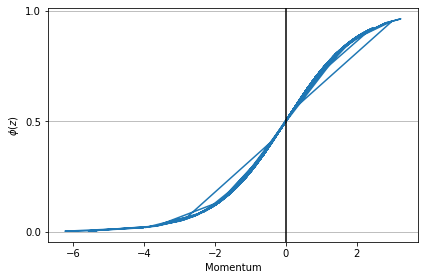

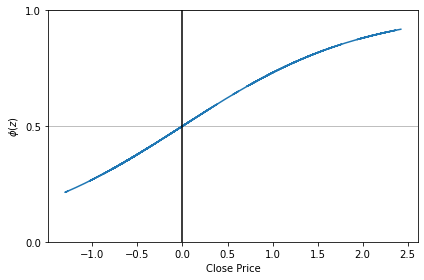

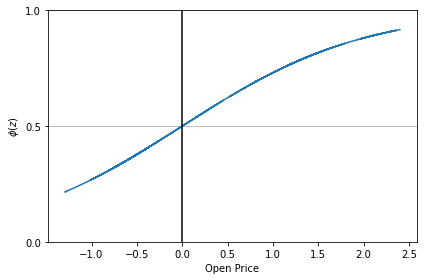

In [76]:
import numpy as np
import matplotlib.pyplot as plt
 
# Sigmoid function
#
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
label_list=['Momentum','Close Price','Open Price']
# Creating sample Z points
for i,z in enumerate([Mo_20,Close_v,Open_v]):
    phi_z = sigmoid(z)
 
    # Plotting the Sigmoid function
    #
    plt.plot(z, phi_z)
    plt.axvline(0.0, color='k')
    plt.xlabel(label_list[i])
    plt.ylabel('$\phi(z)$')
    plt.yticks([0.0, 0.5, 1.0])
    ax = plt.gca()
    ax.yaxis.grid(True)
    plt.tight_layout()
    plt.show()

# Features Selection Methods 
Feature selection methods are approaches to reduce the number of input variables that are believed to be most useful to a model. It is primarily focused on removing non-informative or redundant predictors from the model. We'll focus on few methods in relation to logstic regression.

In [77]:
scaled_features_df

,Open,High,Low,Close,SMA20,EMA,Momentum_20
0,-1.281171,-1.281545,-1.270074,-1.276920,-1.288508,-1.283263,-0.134953
1,-1.273531,-1.284224,-1.280720,-1.291746,-1.287857,-1.284029,-0.254718
2,-1.292182,-1.299853,-1.283891,-1.291072,-1.286383,-1.284602,-0.161996
3,-1.289485,-1.300076,-1.298160,-1.303428,-1.284486,-1.286769,-0.114347
4,-1.293305,-1.292485,-1.286835,-1.288826,-1.281927,-1.286671,-0.039655
...,...,...,...,...,...,...,...
1214,2.311031,2.292086,2.300517,2.287965,2.200883,2.258199,-0.237977
1215,2.305638,2.315083,2.318411,2.336938,2.206653,2.275255,0.322216
1216,2.372377,2.370677,2.381605,2.353337,2.221495,2.292251,1.344729
1217,2.365186,2.384296,2.400631,2.369961,2.237834,2.309226,1.513430


In [78]:
X=features
X

,Open,High,Low,Close,SMA20,EMA,Momentum_20
0,88.099998,88.559998,88.070000,88.290001,87.513001,87.881816,1.500000
1,88.440002,88.440002,87.599998,87.629997,87.541501,87.848145,0.569999
2,87.610001,87.739998,87.459999,87.660004,87.606001,87.822998,1.290001
3,87.730003,87.730003,86.830002,87.110001,87.689001,87.727729,1.660004
4,87.559998,88.070000,87.330002,87.760002,87.801001,87.732040,2.240005
...,...,...,...,...,...,...,...
1214,247.960007,248.619995,245.710007,246.979996,240.207498,243.537685,0.699997
1215,247.720001,249.649994,246.500000,249.160004,240.459998,244.287327,5.050003
1216,250.690002,252.139999,249.289993,249.889999,241.109499,245.034350,12.990005
1217,250.369995,252.750000,250.130005,250.630005,241.824499,245.780438,14.300003


# Method 1 VIF:
Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. This means that an independent variable can be predicted from another independent variable in a regression model.

Multicollinearity can be detected using various methods and one such method is Variable Inflation Factors (VIF). VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

VIF score of an independent variable represents how well the variable is explained by other independent variables.

$$VIF=\frac{1}{1-R^2}$$ <br>
Where A high value of $R^2$ means that the variable is highly correlated with the other variables.


VIF starts at 1 and has no upper limit <br>
VIF = 1, no correlation between the independent variable and the other variables <br>
VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others <br>

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X):
    scaler = StandardScaler()
    xs = scaler.fit_transform(X)
    
    # subsume into a dataframe
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF Factor"] = [variance_inflation_factor(xs, i) for i in range(xs.shape[1])]
    
    return vif

In [80]:
vif(X).round(4)

,Features,VIF Factor
0,Open,4773.2584
1,High,6286.6998
2,Low,3837.3607
3,Close,4139.8333
4,SMA20,3435.3284
5,EMA,5684.0165
6,Momentum_20,4.3588


Any features that has a higher VIF than 5 needs to be removed. In this case on Momentum_20 will remain

# Method 2: SelectKBest


In [81]:
from sklearn.feature_selection import SelectKBest, SelectPercentile,f_classif
method2=SelectKBest(f_classif,k=6)
method2.fit(X_train,y_train)
method2.get_support(indices=True)

array([0, 1, 2, 3, 5, 6], dtype=int64)

In [82]:
for f, s in zip(X.columns, method2.scores_):
    print(f'F-score: {s:0.4} for feature {f}')

F-score: 0.0798 for feature Open
F-score: 0.1851 for feature High
F-score: 0.334 for feature Low
F-score: 0.5791 for feature Close
F-score: 0.0009789 for feature SMA20
F-score: 0.01093 for feature EMA
F-score: 26.74 for feature Momentum_20


F-Scores can be seen as a measure of how informative each feature is for the dataset. The F-scores represents the ratio between the explained and the unexplained Variance. In our case Momentum is a clear winner.

# Method 3: Shapley Values

In [86]:
from sklearn.pipeline import Pipeline
logstic=linear_model.LogisticRegression()
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LogisticRegression())
])

In [87]:
pipe.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LogisticRegression())])

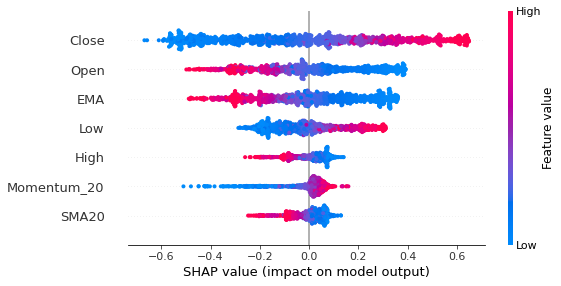

In [88]:
import shap
X100 = shap.utils.sample(X, 100, random_state=42)
explainer = shap.Explainer(pipe.predict, X100)
shap_values = explainer(X)
shap_values
shap.plots.beeswarm(shap_values, max_display=14)

In [89]:
shap_method=features[['Close','EMA','High','Momentum_20']]
shap_method

,Close,EMA,High,Momentum_20
0,88.290001,87.881816,88.559998,1.500000
1,87.629997,87.848145,88.440002,0.569999
2,87.660004,87.822998,87.739998,1.290001
3,87.110001,87.727729,87.730003,1.660004
4,87.760002,87.732040,88.070000,2.240005
...,...,...,...,...
1214,246.979996,243.537685,248.619995,0.699997
1215,249.160004,244.287327,249.649994,5.050003
1216,249.889999,245.034350,252.139999,12.990005
1217,250.630005,245.780438,252.750000,14.300003


In [90]:
pipe.fit(shap_method, y)
# predict labels
y_pred = pipe.predict(shap_method)
print(y_pred)
print(f'R^2: {pipe.score(shap_method, y):0.4}')

[1 1 1 ... 1 1 1]
R^2: 0.6292


# Plot Logistic Sigmoid (Best winning Features)
Winning Features:<br>
1)Momentum <br>
2)Close <br>
3)Low <br>


In [94]:
low_v=scaled_features_df['Low']
low_v

0      -1.270074
1      -1.280720
2      -1.283891
3      -1.298160
4      -1.286835
          ...   
1214    2.300517
1215    2.318411
1216    2.381605
1217    2.400631
1218    2.424414
Name: Low, Length: 1219, dtype: float64

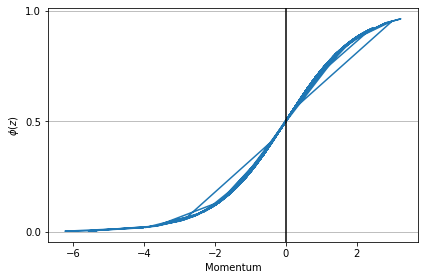

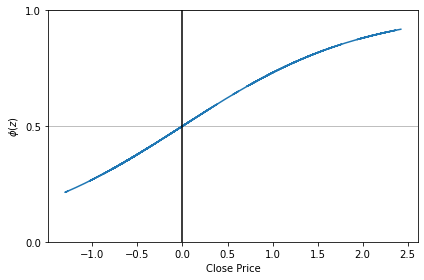

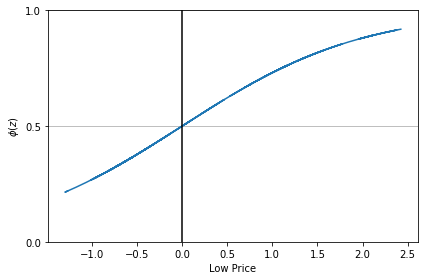

In [96]:
label_list=['Momentum','Close Price','Low Price']
# Creating sample Z points
for i,z in enumerate([Mo_20,Close_v,low_v]):
    phi_z = sigmoid(z)
 
    # Plotting the Sigmoid function
    #
    plt.plot(z, phi_z)
    plt.axvline(0.0, color='k')
    plt.xlabel(label_list[i])
    plt.ylabel('$\phi(z)$')
    plt.yticks([0.0, 0.5, 1.0])
    ax = plt.gca()
    ax.yaxis.grid(True)
    plt.tight_layout()
    plt.show()

Features Restricted To:<br>
1)Close <br>
2)EMA <br>
3)Momentum <br>

In [97]:
y4=log_reg_L1.predict(X_test)

In [98]:
from sklearn.metrics import(confusion_matrix,accuracy_score) #Confusion matrix and visualing it
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y4)
cm

array([[107,  96],
       [ 14, 271]], dtype=int64)

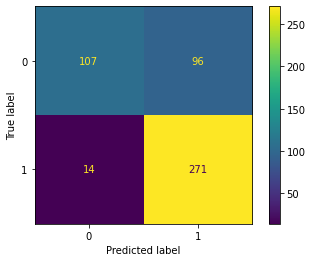

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()



$$Precision=\frac{True Positive}{True Positive+False Positive}$$ <br>

$$Recall=\frac{True Positive}{True Positive+False Negative}$$

ROC Curve

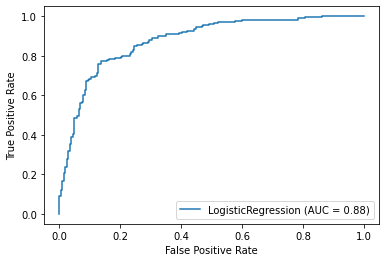

In [100]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
metrics.plot_roc_curve(log_reg_L1, X_test, y_test) 

In [101]:
s=log_reg_L1.predict_proba(X_test)
up=s[s[:,1]>0.5]
down=s[s[:,1]<0.5]
up,down

(array([[0.24710177, 0.75289823],
        [0.40247186, 0.59752814],
        [0.28687277, 0.71312723],
        [0.32370038, 0.67629962],
        [0.34569459, 0.65430541],
        [0.17203246, 0.82796754],
        [0.36333137, 0.63666863],
        [0.44781749, 0.55218251],
        [0.32768708, 0.67231292],
        [0.42355925, 0.57644075],
        [0.42814746, 0.57185254],
        [0.15332705, 0.84667295],
        [0.16746559, 0.83253441],
        [0.36864961, 0.63135039],
        [0.43358145, 0.56641855],
        [0.37662543, 0.62337457],
        [0.39518301, 0.60481699],
        [0.43784757, 0.56215243],
        [0.31725018, 0.68274982],
        [0.39072957, 0.60927043],
        [0.1567421 , 0.8432579 ],
        [0.19865635, 0.80134365],
        [0.37915224, 0.62084776],
        [0.36038324, 0.63961676],
        [0.36721413, 0.63278587],
        [0.20135812, 0.79864188],
        [0.33655427, 0.66344573],
        [0.35977585, 0.64022415],
        [0.43845785, 0.56154215],
        [0.292

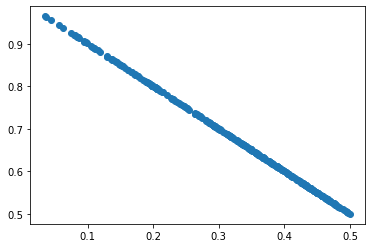

In [102]:
plt.scatter(up[:,0],up[:,1])

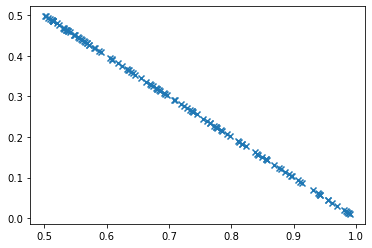

In [103]:
plt.scatter(down[:,0],down[:,1],marker='x')

**References**<br>
[Python Labs Introduction to ML using Scikit-learn - II](Kannan Singaravelu Certificate in Quantitative Finance, June 2021)<br>
[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)<br>
[Logistic Regression - THE MATH YOU SHOULD KNOW!](https://www.youtube.com/watch?v=YMJtsYIp4kg)<br>
[Sklearn Documentation ](https://scikit-learn.org/stable/)<br>
[Bias and Variance Trade-Off](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) <br>